# Background
Cab booking system is the process where renting a cab is automated through an
app throughout a city. Using this app people can book a cab from one location
to another location. Being a cab booking app company, exploiting an
understanding of cab supply and demand could increase the efficiency of their
service and enhance user experience by minimizing waiting time.

# Objective
Objective of this project is to combine historical usage pattern along with the
open data sources like weather data to forecast cab booking demand in a city

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [ ]:
X_train = pd.read_csv('train1.csv')
y_train = pd.read_csv('train_label1.csv', names=['total_booking'])
X_test = pd.read_csv('test1.csv')
y_test = pd.read_csv('test_label1.csv', names=['total_booking_t'])

In [ ]:
X_train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [ ]:
y_train.head(5)

,total_booking
0,504
1,5
2,139
3,209
4,184


In [ ]:
X_test.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [ ]:
y_test.head(5)

,total_booking_t
0,256
1,87
2,11
3,84
4,668


### Analyzing the data

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8708, 9) (8708, 1) (2178, 9) (2178, 1)


In [ ]:
print(X_train.dtypes)
print('\n')
print(y_train.dtypes)

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object


total_booking    int64
dtype: object


In [ ]:
# Missing values in training set
X_train.info()
print('missing values', X_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8708 non-null   object 
 1   season      8708 non-null   object 
 2   holiday     8708 non-null   int64  
 3   workingday  8708 non-null   int64  
 4   weather     8708 non-null   object 
 5   temp        8708 non-null   float64
 6   atemp       8708 non-null   float64
 7   humidity    8708 non-null   int64  
 8   windspeed   8708 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 612.4+ KB
missing values datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


In [ ]:
y_train.info()
print('missing values', y_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   total_booking  8708 non-null   int64
dtypes: int64(1)
memory usage: 68.2 KB
missing values total_booking    0
dtype: int64


In [ ]:
# now checking missing values in training set
X_test.info()
print('missing values', X_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    2178 non-null   object 
 1   season      2178 non-null   object 
 2   holiday     2178 non-null   int64  
 3   workingday  2178 non-null   int64  
 4   weather     2178 non-null   object 
 5   temp        2178 non-null   float64
 6   atemp       2178 non-null   float64
 7   humidity    2178 non-null   int64  
 8   windspeed   2178 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 153.3+ KB
missing values datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


In [ ]:
y_test.info()
print('missing values', y_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   total_booking_t  2178 non-null   int64
dtypes: int64(1)
memory usage: 17.1 KB
missing values total_booking_t    0
dtype: int64


### Feature Engineering

In [ ]:
# Creating new collumns for the datetime column
X_train['datetime'] = pd.to_datetime(X_train['datetime'])

X_train['date'] = X_train['datetime'].dt.date
X_train['hour'] = X_train['datetime'].dt.hour
X_train['weekDay'] = X_train['datetime'].dt.weekday
X_train['month'] = X_train['datetime'].dt.month

X_train.drop(columns = ['datetime'], inplace=True)
X_train.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,2012-05-02,19,2,5
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,2012-09-05,4,2,9


In [ ]:
X_test['datetime'] = pd.to_datetime(X_test['datetime'])

X_test['date'] = X_test['datetime'].dt.date
X_test['hour'] = X_test['datetime'].dt.hour
X_test['weekDay'] = X_test['datetime'].dt.weekday
X_test['month'] = X_test['datetime'].dt.month

X_test.drop(columns = ['datetime'], inplace=True)
X_test.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,2012-05-10,11,3,5
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,2012-06-09,7,5,6


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Applying label encoder of categorical variables
label_encod = LabelEncoder()
X_train['season'] = label_encod.fit_transform(X_train['season'])

X_test['season'] = label_encod.fit_transform(X_test['season'])

In [ ]:
X_train['weather'].value_counts()

 Clear + Few clouds            5753
 Mist + Cloudy                 2276
 Light Snow, Light Rain         678
 Heavy Rain + Thunderstorm        1
Name: weather, dtype: int64

In [ ]:
# Creating dummy variables for weather
X_train = pd.get_dummies(X_train, columns = ['weather'])
X_train.head()

,season,holiday,workingday,temp,atemp,humidity,windspeed,date,hour,weekDay,month,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2,0,1,22.14,25.760,77,16.9979,2012-05-02,19,2,5,1,0,0,0
1,0,0,1,28.70,33.335,79,19.0012,2012-09-05,4,2,9,1,0,0,0
2,1,0,1,5.74,6.060,50,22.0028,2011-01-13,9,3,1,1,0,0,0
3,3,0,1,13.94,16.665,29,8.9981,2011-11-18,16,4,11,1,0,0,0
4,0,0,1,30.34,33.335,51,19.0012,2011-09-13,13,1,9,1,0,0,0


In [ ]:
X_test = pd.get_dummies(X_test, columns = ['weather'])
X_test.head()

,season,holiday,workingday,temp,atemp,humidity,windspeed,date,hour,weekDay,month,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2,0,1,21.32,25.000,48,35.0008,2012-05-10,11,3,5,1,0,0
1,2,0,0,23.78,27.275,64,7.0015,2012-06-09,7,5,6,1,0,0
2,1,0,0,11.48,12.120,100,27.9993,2011-03-06,20,6,3,0,1,0
3,3,0,1,25.42,28.790,83,0.0000,2011-10-13,11,3,10,0,0,1
4,2,0,0,25.42,31.060,43,23.9994,2012-06-02,12,5,6,1,0,0


### Outlier Analysis

In [ ]:
X_train['total_booking'] = y_train['total_booking']
X_train.head(2)

,season,holiday,workingday,temp,atemp,humidity,windspeed,date,hour,weekDay,month,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,total_booking
0,2,0,1,22.14,25.760,77,16.9979,2012-05-02,19,2,5,1,0,0,0,504
1,0,0,1,28.70,33.335,79,19.0012,2012-09-05,4,2,9,1,0,0,0,5


In [ ]:
X_test['total_booking_t'] = y_test['total_booking_t']
X_test.head(2)

,season,holiday,workingday,temp,atemp,humidity,windspeed,date,hour,weekDay,month,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,total_booking_t
0,2,0,1,21.32,25.000,48,35.0008,2012-05-10,11,3,5,1,0,0,256
1,2,0,0,23.78,27.275,64,7.0015,2012-06-09,7,5,6,1,0,0,87


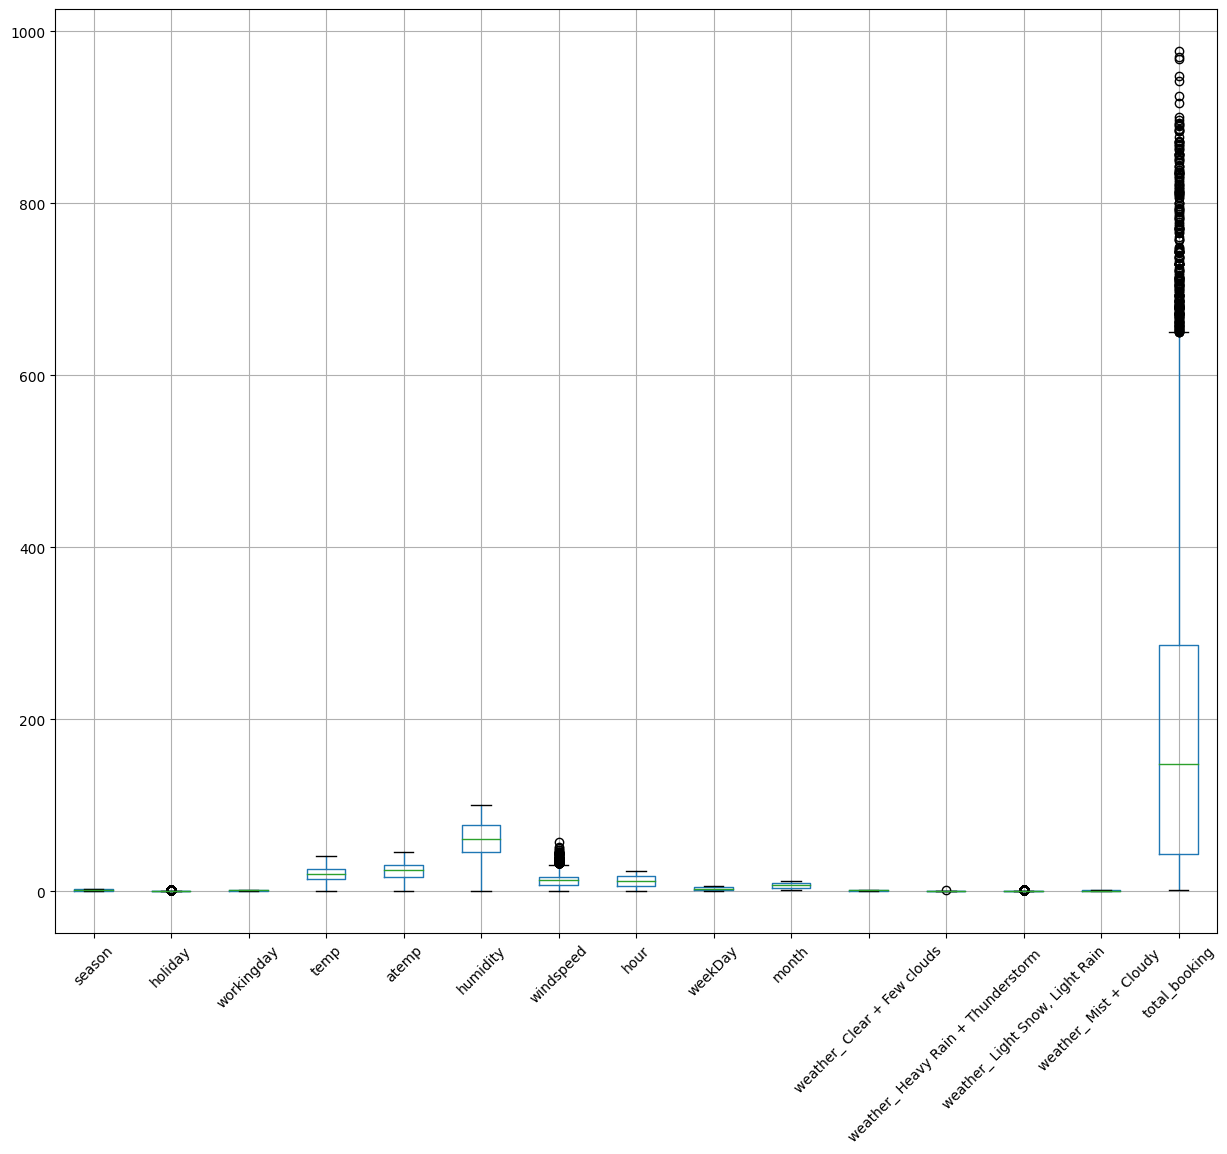

In [ ]:
plt.figure(figsize=(15,12))
X_train.boxplot()
plt.xticks(rotation=45)
plt.show()

<Axes: >

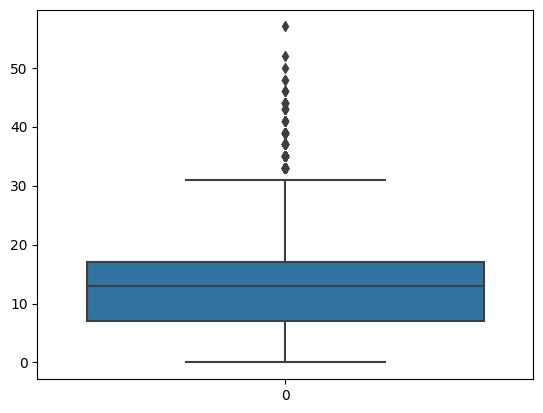

In [ ]:
sns.boxplot(X_train['windspeed'])

<Axes: >

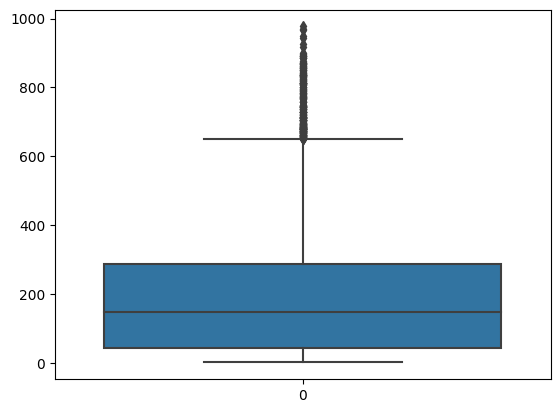

In [ ]:
sns.boxplot(X_train['total_booking'])

In [ ]:
# Removing outlier of windspeed using IQR
q1 = X_train['total_booking'].quantile(0.25)
q3 = X_train['total_booking'].quantile(0.75)
iqr = q3 - q1
wisker1 = q1 - 1.5*iqr
wisker2 = q3 + 1.5*iqr
X_train_clean = X_train[(X_train['total_booking'] >= wisker1) & ((X_train['total_booking'] <= wisker2))]

<Axes: >

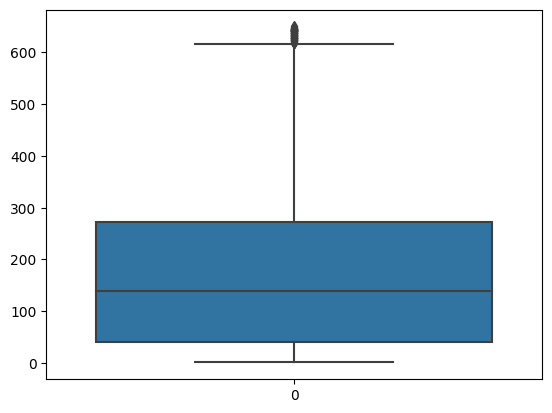

In [ ]:
sns.boxplot(X_train_clean['total_booking'])

In [ ]:
# Removing outlier of total_booking using IQR
q1 = X_train_clean['windspeed'].quantile(0.25)
q3 = X_train_clean['windspeed'].quantile(0.75)
iqr = q3 - q1
wisker1 = q1 - 1.5*iqr
wisker2 = q3 + 1.5*iqr
X_train_clean2 = X_train_clean[(X_train_clean['windspeed'] >= wisker1) & ((X_train_clean['windspeed'] <= wisker2))]

<Axes: >

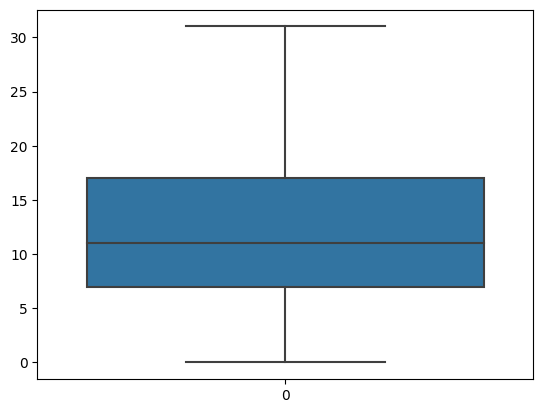

In [ ]:
sns.boxplot(X_train_clean2['windspeed'])

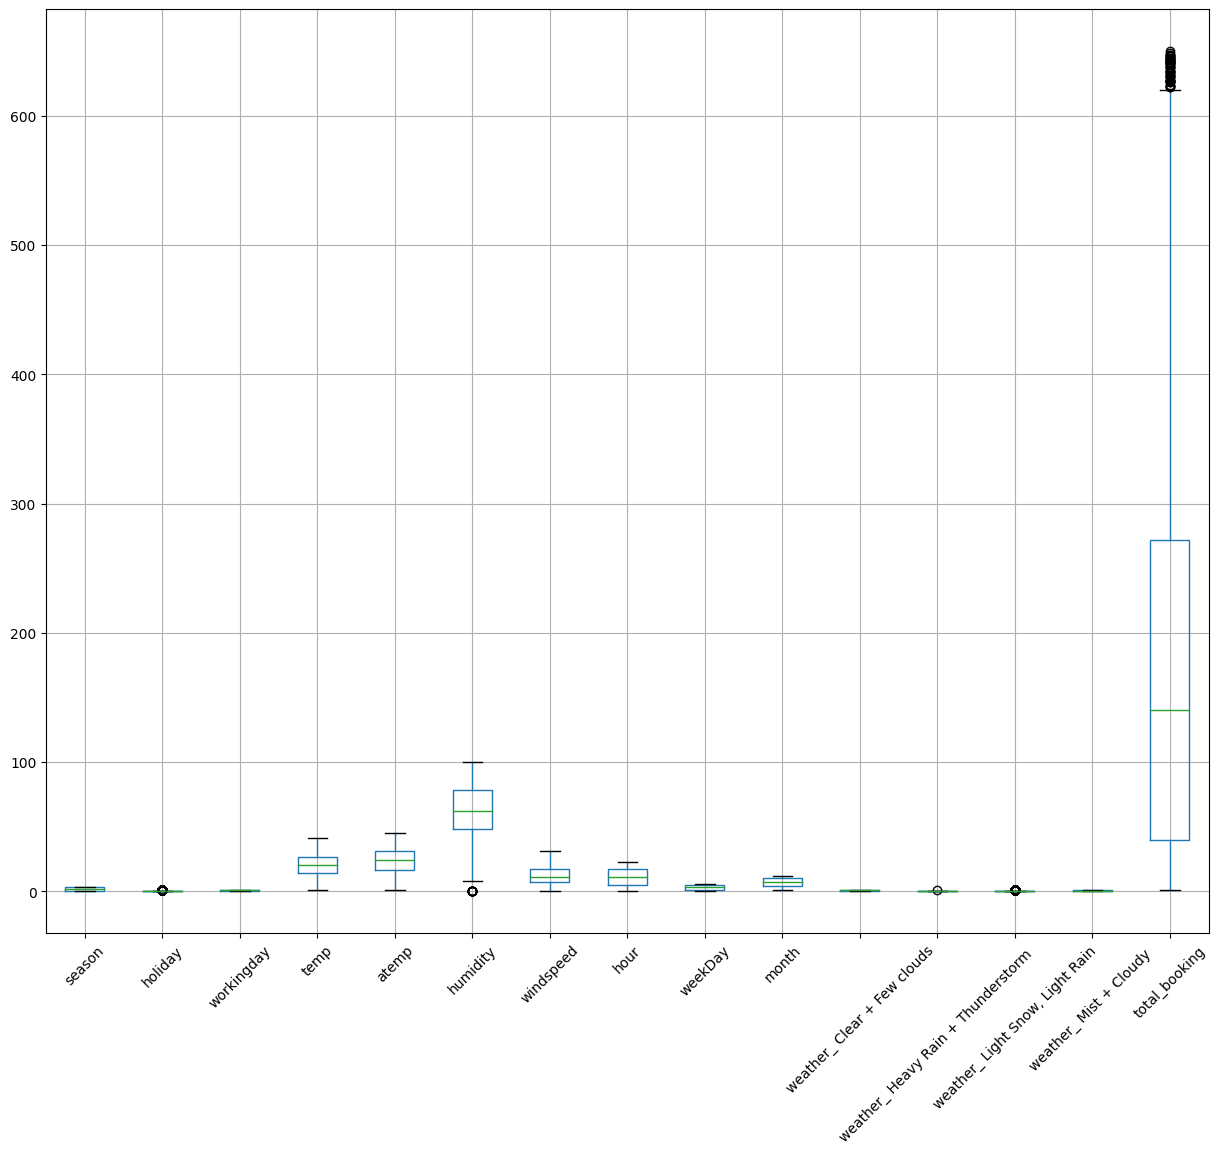

In [ ]:
plt.figure(figsize=(15,12))
X_train_clean2.boxplot()
plt.xticks(rotation=45)
plt.show()

### outlier removal for test data

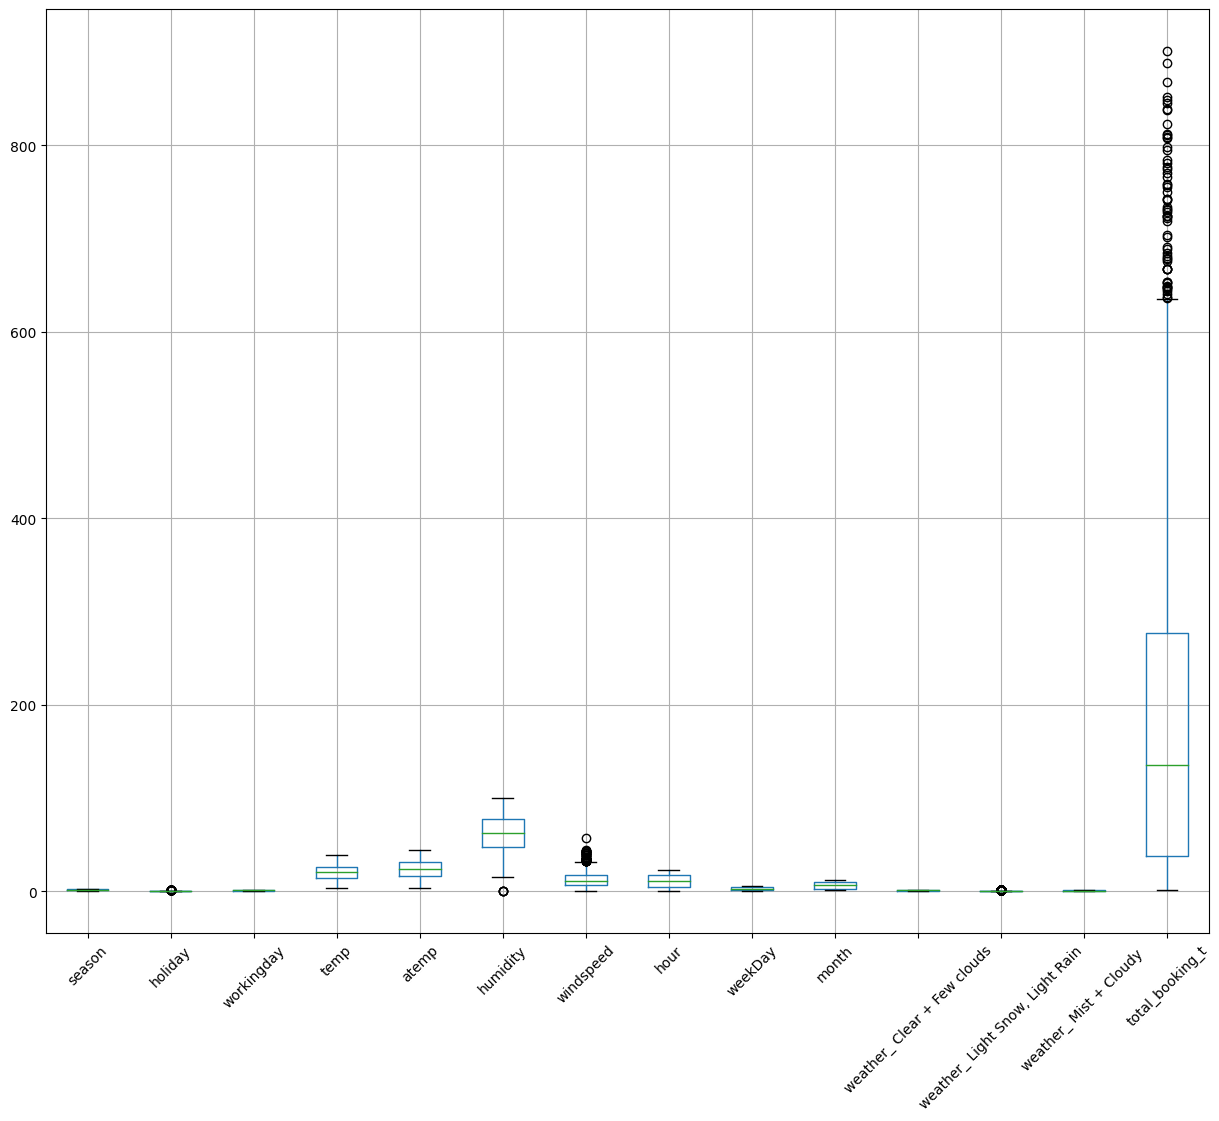

In [ ]:
plt.figure(figsize=(15,12))
X_test.boxplot()
plt.xticks(rotation=45)
plt.show()

<Axes: >

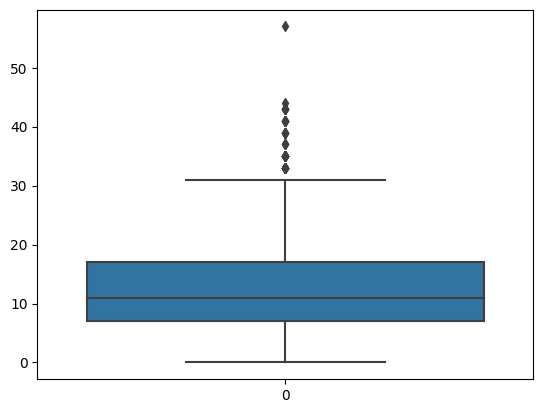

In [ ]:
sns.boxplot(X_test['windspeed'])

<Axes: >

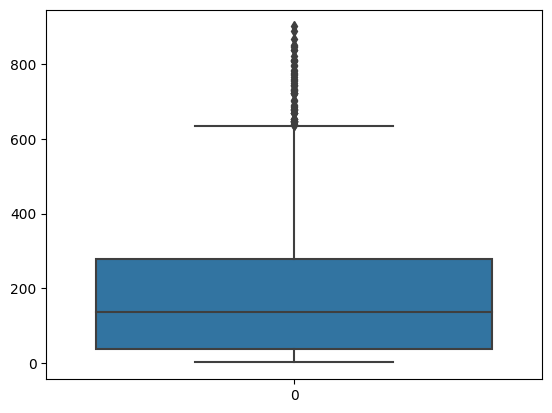

In [ ]:
sns.boxplot(X_test['total_booking_t'])

In [ ]:
# Removing outlier of windspeed using IQR
q1 = X_test['total_booking_t'].quantile(0.25)
q3 = X_test['total_booking_t'].quantile(0.75)
iqr = q3 - q1
wisker1 = q1 - 1.5*iqr
wisker2 = q3 + 1.5*iqr
X_test_clean = X_test[(X_test['total_booking_t'] >= wisker1) & ((X_test['total_booking_t'] <= wisker2))]

<Axes: >

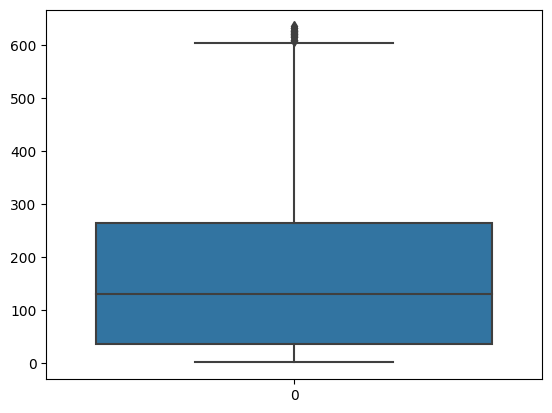

In [ ]:
sns.boxplot(X_test_clean['total_booking_t'])

In [ ]:
# Removing outlier of total_booking using IQR
q1 = X_test_clean['windspeed'].quantile(0.25)
q3 = X_test_clean['windspeed'].quantile(0.75)
iqr = q3 - q1
wisker1 = q1 - 1.5*iqr
wisker2 = q3 + 1.5*iqr
X_test_clean2 = X_test_clean[(X_test_clean['windspeed'] >= wisker1) & ((X_test_clean['windspeed'] <= wisker2))]

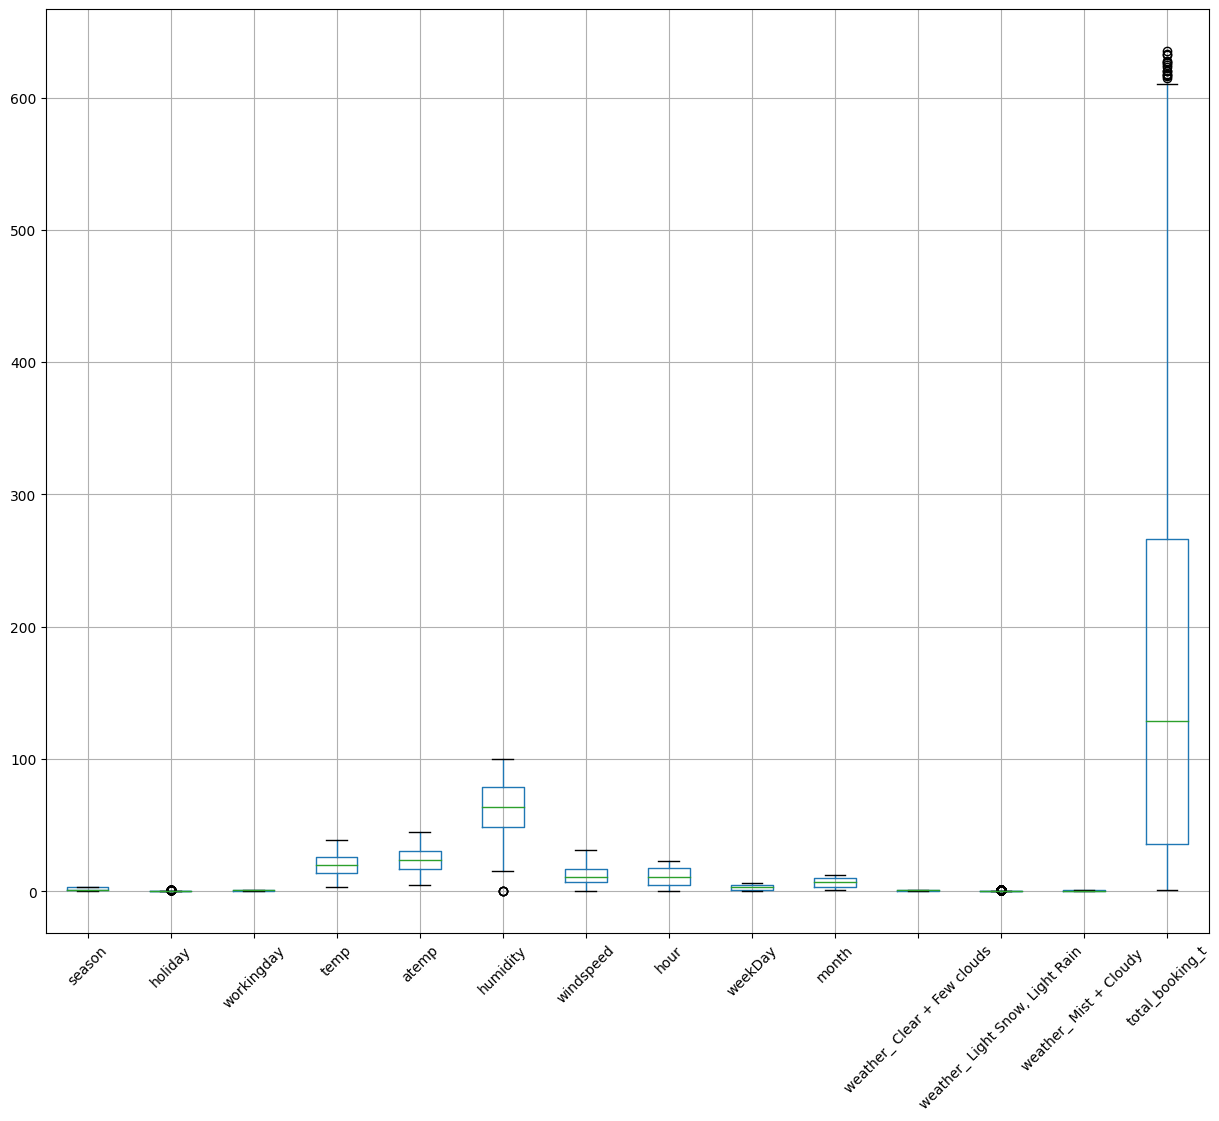

In [ ]:
plt.figure(figsize=(15,12))
X_test_clean2.boxplot()
plt.xticks(rotation=45)
plt.show()

### Correlation Analysis

In [ ]:
X_train = X_train_clean2.drop('total_booking', axis=1)
y_train = X_train_clean2['total_booking']
X_train.head(2)

,season,holiday,workingday,temp,atemp,humidity,windspeed,date,hour,weekDay,month,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2,0,1,22.14,25.760,77,16.9979,2012-05-02,19,2,5,1,0,0,0
1,0,0,1,28.70,33.335,79,19.0012,2012-09-05,4,2,9,1,0,0,0


In [ ]:
y_train.head(2)

0    504
1      5
Name: total_booking, dtype: int64

In [ ]:
X_test = X_test_clean2.drop('total_booking_t', axis=1)
y_test = X_test_clean2['total_booking_t']
X_test.head(2)

,season,holiday,workingday,temp,atemp,humidity,windspeed,date,hour,weekDay,month,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
1,2,0,0,23.78,27.275,64,7.0015,2012-06-09,7,5,6,1,0,0
2,1,0,0,11.48,12.120,100,27.9993,2011-03-06,20,6,3,0,1,0


In [ ]:
y_test.head(2)

1    87
2    11
Name: total_booking_t, dtype: int64

<ipython-input-41-cf942c16b676>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm")


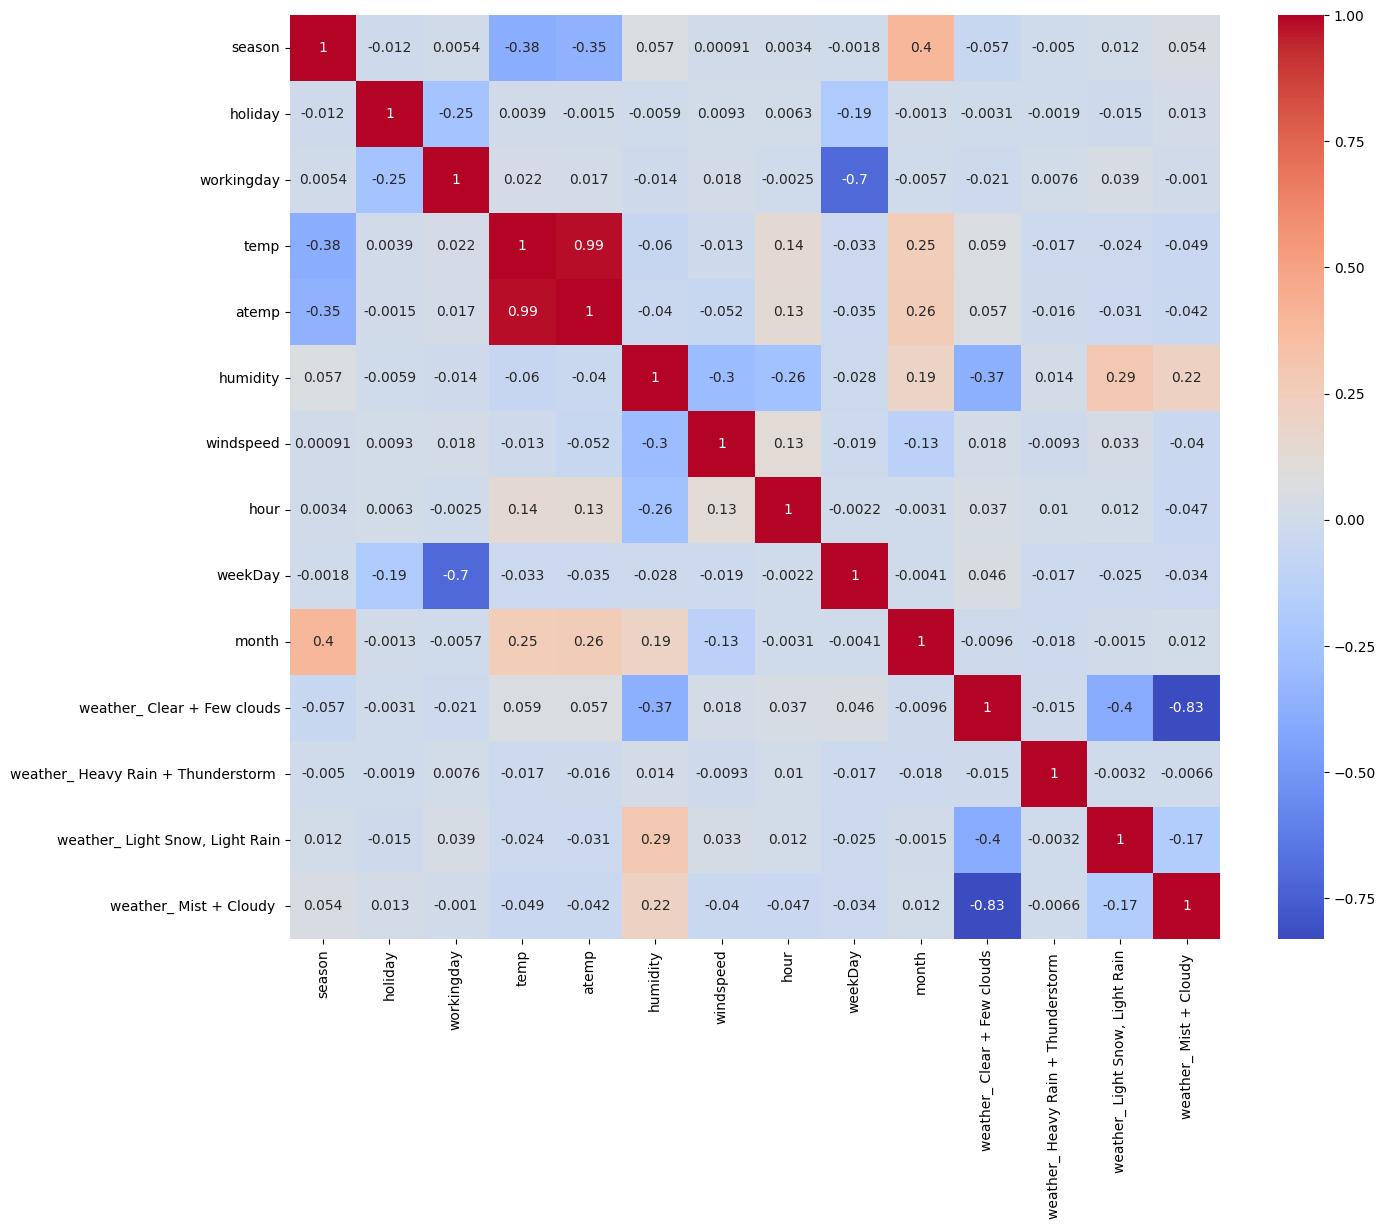

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
# as 'temp' is highly correlated to 'atemp', so, dropping temp.
X_train.drop(columns=['temp'], inplace=True)
X_test.drop(columns=['temp'], inplace=True)

In [ ]:
X_train.head(2)

,season,holiday,workingday,atemp,humidity,windspeed,date,hour,weekDay,month,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2,0,1,25.760,77,16.9979,2012-05-02,19,2,5,1,0,0,0
1,0,0,1,33.335,79,19.0012,2012-09-05,4,2,9,1,0,0,0


In [ ]:
X_test.head(2)

,season,holiday,workingday,atemp,humidity,windspeed,date,hour,weekDay,month,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
1,2,0,0,27.275,64,7.0015,2012-06-09,7,5,6,1,0,0
2,1,0,0,12.120,100,27.9993,2011-03-06,20,6,3,0,1,0


In [ ]:
# Scaling the values of atemp, humidity and windspeed
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

X_train[['atemp', 'humidity', 'windspeed']] = scale.fit_transform(X_train[['atemp', 'humidity', 'windspeed']])

X_test[['atemp', 'humidity', 'windspeed']] = scale.fit_transform(X_test[['atemp', 'humidity', 'windspeed']])

In [ ]:
X_train.head(5)

,season,holiday,workingday,atemp,humidity,windspeed,date,hour,weekDay,month,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2,0,1,0.261882,0.775226,0.621661,2012-05-02,19,2,5,1,0,0,0
1,0,0,1,1.157288,0.880619,0.888536,2012-09-05,4,2,9,1,0,0,0
2,1,0,1,-2.066767,-0.647570,1.288404,2011-01-13,9,3,1,1,0,0,0
3,3,0,1,-0.813198,-1.754189,-0.444057,2011-11-18,16,4,11,1,0,0,0
4,0,0,1,1.157288,-0.594873,0.888536,2011-09-13,13,1,9,1,0,0,0


In [ ]:
X_test.head(5)

,season,holiday,workingday,atemp,humidity,windspeed,date,hour,weekDay,month,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
1,2,0,0,0.449383,0.031823,-0.696046,2012-06-09,7,5,6,1,0,0
2,1,0,0,-1.366743,1.890978,2.201188,2011-03-06,20,6,3,0,1,0
3,3,0,1,0.630936,1.013044,-1.662099,2011-10-13,11,3,10,0,0,1
5,2,0,1,-0.912562,-0.123107,-0.833789,2011-04-01,23,4,4,1,0,0
6,2,0,0,0.358307,0.754828,0.683237,2011-05-15,18,6,5,1,0,0


In [ ]:
# date column is not needed so dropping it
X_train.drop(columns=['date'], inplace=True, axis=1)
X_test.drop(columns=['date'], inplace=True, axis=1)
X_train.head(2)

,season,holiday,workingday,atemp,humidity,windspeed,hour,weekDay,month,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2,0,1,0.261882,0.775226,0.621661,19,2,5,1,0,0,0
1,0,0,1,1.157288,0.880619,0.888536,4,2,9,1,0,0,0


In [ ]:
X_test.head(2)

,season,holiday,workingday,atemp,humidity,windspeed,hour,weekDay,month,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
1,2,0,0,0.449383,0.031823,-0.696046,7,5,6,1,0,0
2,1,0,0,-1.366743,1.890978,2.201188,20,6,3,0,1,0


### Data Visualization

<Axes: xlabel='season', ylabel='total_booking'>

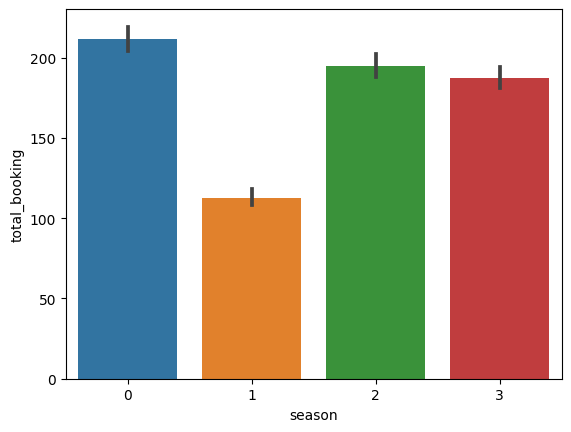

In [ ]:
sns.barplot(x='season',y='total_booking',data=X_train_clean2)

In [ ]:
# On 'Fall' cab bookings are more compared to other seasons
# On 'Spring' cab bookings are less compared to other seasons

<Axes: xlabel='holiday', ylabel='total_booking'>

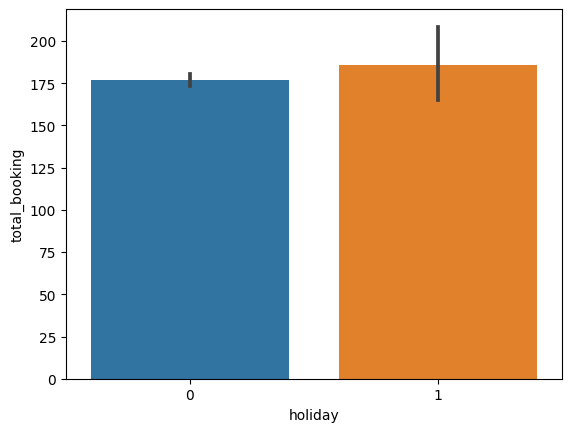

In [ ]:
sns.barplot(x='holiday',y='total_booking',data=X_train_clean2)

In [ ]:
# There is not much difference in booking in holiday and non-holiday

<Axes: xlabel='workingday', ylabel='total_booking'>

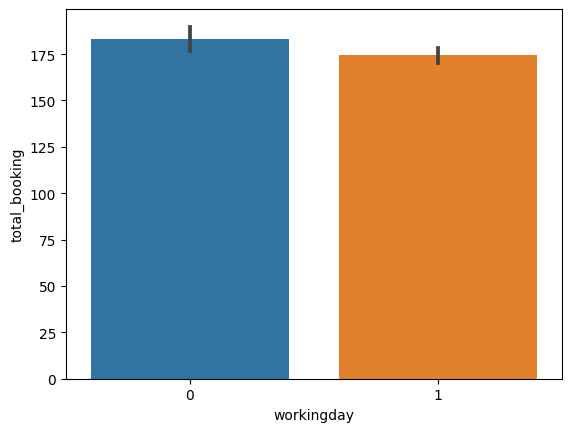

In [ ]:
sns.barplot(x='workingday',y='total_booking',data=X_train_clean2)

In [ ]:
# Cab bookinga are almost same on working and non working day

In [ ]:
X_train_clean2.columns

Index(['season', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'date', 'hour', 'weekDay', 'month',
       'weather_ Clear + Few clouds', 'weather_ Heavy Rain + Thunderstorm ',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy ',
       'total_booking'],
      dtype='object')

<Axes: xlabel='month', ylabel='total_booking'>

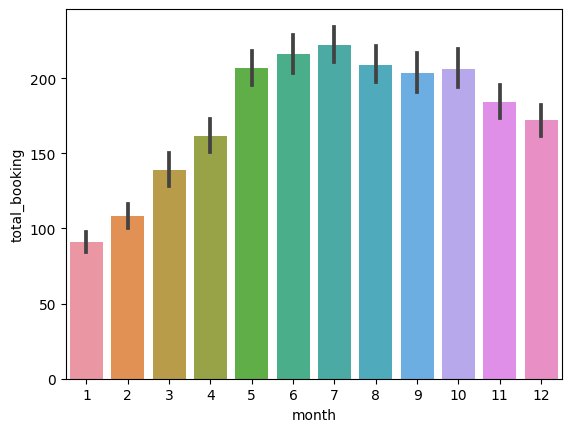

In [ ]:
sns.barplot(x='month',y='total_booking',data=X_train_clean2)

In [ ]:
# Most booking happens during May, June, July, August.

<Axes: xlabel='hour', ylabel='total_booking'>

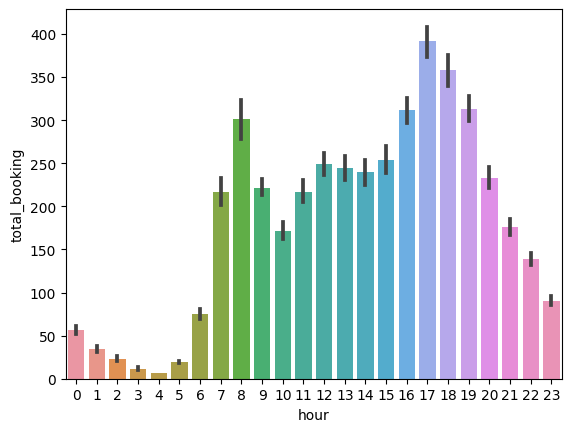

In [ ]:
sns.barplot(x='hour',y='total_booking',data=X_train_clean2)

In [ ]:
# Looks like highest booking happens during evening time

# FITTING VARIOUS MODELS

### APPLYING RANDOM FOREST WITH GRIDSEARCH-CV

In [ ]:
# Applying Random Forest with gridsearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [ ]:
# GSCV_rf = RandomForestRegressor(random_state=40, n_jobs=-1)
GSCV_rf = RandomForestRegressor(max_depth=8, max_features=8, min_samples_leaf=15,
                      n_estimators=100, n_jobs=-1, random_state=100)

In [ ]:
GSCV_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=8, min_samples_leaf=15,
                      n_jobs=-1, random_state=100)

In [ ]:
train_pred = GSCV_rf.predict(X_train)
r2_score(y_train, train_pred)

0.7972232283980547

In [ ]:
X_train.head(2)

,season,holiday,workingday,atemp,humidity,windspeed,hour,weekDay,month,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2,0,1,0.261882,0.775226,0.621661,19,2,5,1,0,0,0
1,0,0,1,1.157288,0.880619,0.888536,4,2,9,1,0,0,0


In [ ]:
X_test.head(2)

,season,holiday,workingday,atemp,humidity,windspeed,hour,weekDay,month,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
1,2,0,0,0.449383,0.031823,-0.696046,7,5,6,1,0,0
2,1,0,0,-1.366743,1.890978,2.201188,20,6,3,0,1,0


In [ ]:
X_test.shape

(2074, 12)

In [ ]:
extra = pd.DataFrame(0, index = range(2074), columns = ['weather_ Heavy Rain + Thunderstorm '])
extra.head()

,weather_ Heavy Rain + Thunderstorm
0,0
1,0
2,0
3,0
4,0


In [ ]:
# 'weather_ Heavy Rain + Thunderstorm' column is missing
# in the X_test dataset so adding a new column with zero values
var = []
for i in range(0,2074):
  var.append(int(0))
print(len(var))
new_column = pd.Series(var, name='weather_ Heavy Rain + Thunderstorm ')
new_column.shape

2074


(2074,)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8291 entries, 0 to 8707
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   season                               8291 non-null   int64  
 1   holiday                              8291 non-null   int64  
 2   workingday                           8291 non-null   int64  
 3   atemp                                8291 non-null   float64
 4   humidity                             8291 non-null   float64
 5   windspeed                            8291 non-null   float64
 6   hour                                 8291 non-null   int64  
 7   weekDay                              8291 non-null   int64  
 8   month                                8291 non-null   int64  
 9   weather_ Clear + Few clouds          8291 non-null   uint8  
 10  weather_ Heavy Rain + Thunderstorm   8291 non-null   uint8  
 11  weather_ Light Snow, Light Rai

In [ ]:
# X_test.drop('weather_ Heavy Rain + Thunderstorm', inplace=True, axis=1)
# X_test.head(4)

In [ ]:
X_test.insert(10, 'weather_ Heavy Rain + Thunderstorm ', new_column)
X_test

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 1 to 2177
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   season                               2074 non-null   int64  
 1   holiday                              2074 non-null   int64  
 2   workingday                           2074 non-null   int64  
 3   atemp                                2074 non-null   float64
 4   humidity                             2074 non-null   float64
 5   windspeed                            2074 non-null   float64
 6   hour                                 2074 non-null   int64  
 7   weekDay                              2074 non-null   int64  
 8   month                                2074 non-null   int64  
 9   weather_ Clear + Few clouds          2074 non-null   uint8  
 10  weather_ Heavy Rain + Thunderstorm   1975 non-null   float64
 11  weather_ Light Snow, Light Rai

In [ ]:
X_test['weather_ Heavy Rain + Thunderstorm '] = X_test['weather_ Heavy Rain + Thunderstorm '].fillna(0)
X_test['weather_ Heavy Rain + Thunderstorm '] = X_test['weather_ Heavy Rain + Thunderstorm '].astype(np.uint8)
X_test.head(5)

In [ ]:
X_test.info()

In [ ]:
test_pred = GSCV_rf.predict(X_test)
r2_score(y_test, test_pred)

0.7932413640993661

In [ ]:
params = {
    'max_depth': [3, 4, 5, 8, 10, 15],
    'min_samples_leaf': [10, 15, 20, 25, 30, 40],
    'max_features': [4, 6, 8, 10, 13],
    'n_estimators': [50, 80, 100, 150, 200, 250]
}

In [ ]:
grid_search = GridSearchCV(estimator = GSCV_rf,
                           param_grid = params,
                           cv=4, n_jobs = -1, verbose = 1, scoring = 'neg_mean_squared_error')

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 1080 candidates, totalling 4320 fits
CPU times: user 29.2 s, sys: 4.31 s, total: 33.5 s
Wall time: 43min 38s


GridSearchCV(cv=4,
             estimator=RandomForestRegressor(max_depth=8, max_features=8,
                                             min_samples_leaf=15, n_jobs=-1,
                                             random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 8, 10, 15],
                         'max_features': [4, 6, 8, 10, 13],
                         'min_samples_leaf': [10, 15, 20, 25, 30, 40],
                         'n_estimators': [50, 80, 100, 150, 200, 250]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=15, max_features=13, min_samples_leaf=10,
                      n_estimators=250, n_jobs=-1, random_state=100)

In [ ]:
# Creating random forest model using best_estimator_ suggested by Grid Search CV
rf_cv_model = RandomForestRegressor(max_depth=15, max_features=13, min_samples_leaf=10,
                      n_estimators=250, n_jobs=-1, random_state=100)

In [ ]:
rf_cv_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=13, min_samples_leaf=10,
                      n_estimators=250, n_jobs=-1, random_state=100)

In [ ]:
train_pred = rf_cv_model.predict(X_train)

In [ ]:
r2_score(y_train, train_pred)

0.8826031638408888

In [ ]:
test_pred = rf_cv_model.predict(X_test)
r2_score(y_test, test_pred)

0.8536094346289348

### USING ADA-BOOST REGRESSOR:

In [ ]:
# USING ADA-BOOST REGRESSOR:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada_boost_reg_model = AdaBoostRegressor(estimator=rf_cv_model,
                                        n_estimators=100,
                                        learning_rate=0.1,
                                        random_state=100)

In [ ]:
ada_boost_reg_model.fit(X_train, y_train)

AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=15, max_features=13,
                                                  min_samples_leaf=10,
                                                  n_estimators=250, n_jobs=-1,
                                                  random_state=100),
                  learning_rate=0.1, n_estimators=100, random_state=100)

In [ ]:
# Checking r2 score for ada boost regressor for train set
train_pred_ada = ada_boost_reg_model.predict(X_train)
r2_score(y_train, train_pred_ada)

0.9186046947199283

In [ ]:
# Checking r2 score for ada boost regressor for train set
test_pred_ada = ada_boost_reg_model.predict(X_test)
r2_score(y_test, test_pred_ada)

0.8636678782453914

### FITTING SUPPORT VECTOR REGRESSION MODEL

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model = SVR(kernel = 'rbf', gamma = 0.01, C = 1.0, epsilon = 0.1)

In [ ]:
svr_model.fit(X_train, y_train)

SVR(gamma=0.01)

In [ ]:
# Checking train accuracy
train_pred_svr = svr_model.predict(X_train)
r2_score(y_train, train_pred_svr)

0.4634776186220495

In [ ]:
# We can see that SVR's performance is low compared to other models

### NOW FITTING K-NEIGHBOURS REGRESSOR

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knr = KNeighborsRegressor(n_neighbors=9, weights='distance', p=2)

In [ ]:
knr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9, weights='distance')

In [ ]:
train_pred = knr.predict(X_train)
r2_score(y_train, train_pred)

0.9998048977486811

In [ ]:
test_pred = knr.predict(X_test)
r2_score(y_test, test_pred)

0.8311470057384625

In [ ]:
# using grid search CV for KNeighbors
param = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20, 25],  # Adjust the number of neighbors to test
    'weights': ['uniform', 'distance'],  # Weights options
    'p': [1, 2]  # Minkowski distance parameter (1 for Manhattan, 2 for Euclidean)
}

knr_grid_search = GridSearchCV(knr, param, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
knr_grid_search.fit(X_train, y_train)
knr_grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')

In [ ]:
knr_cv = KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')

In [ ]:
knr_cv.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')

In [ ]:
train_pred_knr_cv = knr_cv.predict(X_train)
r2_score(y_train, train_pred_knr_cv)

0.9998048977486811

In [ ]:
test_pred_knr_cv = knr_cv.predict(X_test)
r2_score(y_test, test_pred_knr_cv)

0.8352135189636811

In [ ]:
# So there is not much change in the test predection after using cross velidation
# for K-neighbors regressor

Conclusion:
The best model is Randomforest regressor combined with Ada Boost Regressor (fed through grid search cross validation) with r2 score of 0.86